### Regime Identification in Multivariate Time-series

In [2]:
import regimes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)

In [3]:
# Normalization (Standard)
def normalize(data, type='minmax'):

    if type=='std':
        return (np.array(data) - np.mean(data))/np.std(data)
        
    elif type=='minmax':
        return (np.array(data) - np.min(data))/(np.max(data) - np.min(data))

In [5]:
data1=pd.read_csv(r'../datasets/FLX_FULLSET/FLX_DE-Hai_FLUXNET2015_FULLSET_HH_2000-2012_1-4.csv')
TS=data1["TIMESTAMP_START"]
#TE=data1["TIMESTAMP_END"]
data = data1[["TA_F","LW_IN_F","SW_IN_F","RECO_NT_VUT_REF","RECO_DT_VUT_REF",]]   #"TIMESTAMP_START","TIMESTAMP_END"

In [6]:
data=data.apply(normalize)

In [7]:
data.isnull().sum()

TA_F               0
LW_IN_F            0
SW_IN_F            0
RECO_NT_VUT_REF    0
RECO_DT_VUT_REF    0
dtype: int64

In [8]:
data.isna().sum().sum()

0

In [9]:
data = data.apply(normalize)
data

,TA_F,LW_IN_F,SW_IN_F,RECO_NT_VUT_REF,RECO_DT_VUT_REF
0,0.330024,0.627046,0.0,0.100121,0.038063
1,0.329105,0.627046,0.0,0.099702,0.038016
2,0.330392,0.625027,0.0,0.100289,0.038081
3,0.331679,0.625027,0.0,0.100879,0.038147
4,0.332046,0.625027,0.0,0.101047,0.038165
...,...,...,...,...,...
227947,0.428388,0.540219,0.0,0.166628,0.055412
227948,0.423423,0.565750,0.0,0.164845,0.054303
227949,0.420482,0.528985,0.0,0.163788,0.053650
227950,0.414966,0.543458,0.0,0.161804,0.052436


In [10]:
data.isnull().sum()

TA_F               0
LW_IN_F            0
SW_IN_F            0
RECO_NT_VUT_REF    0
RECO_DT_VUT_REF    0
dtype: int64

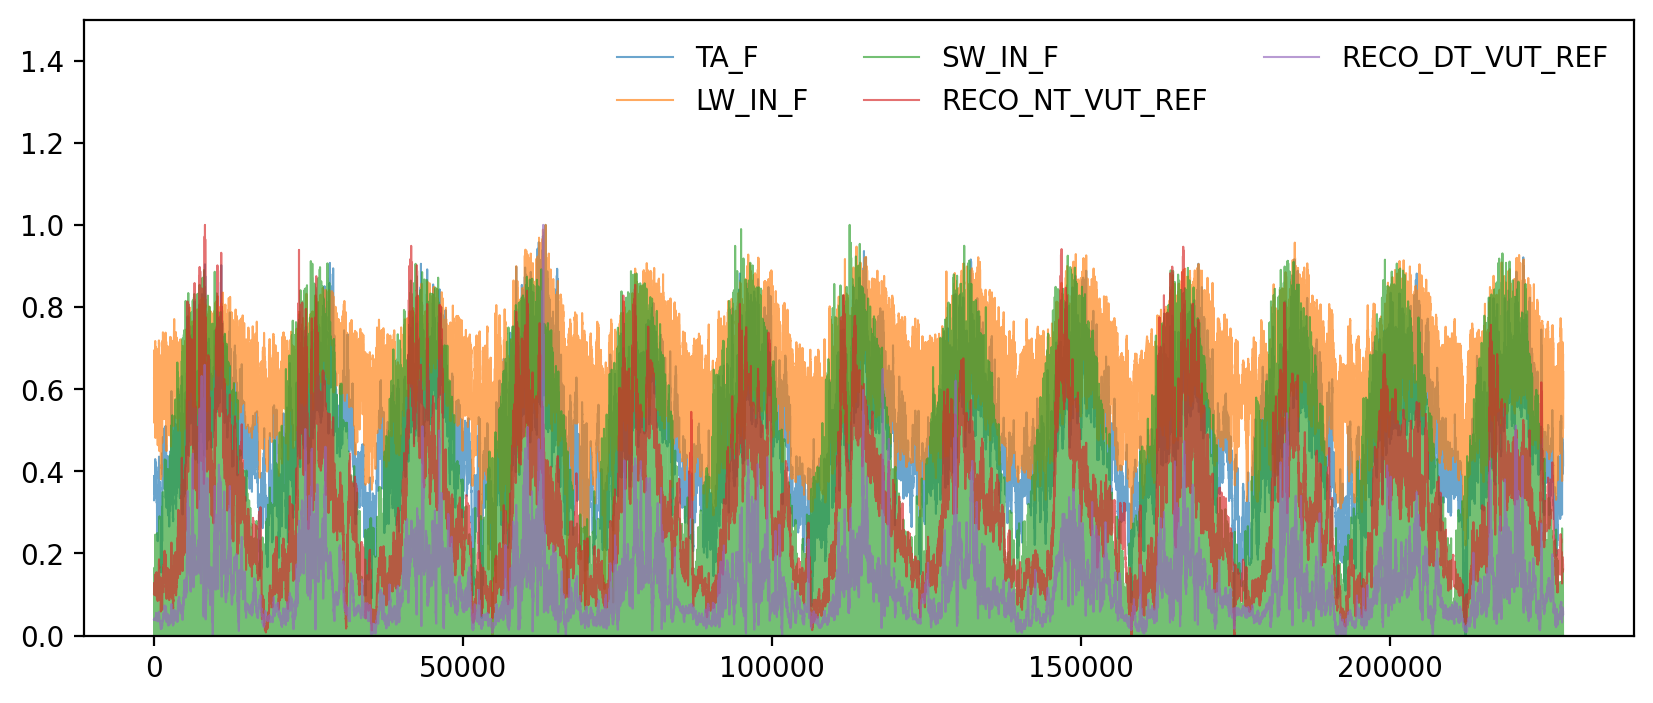

In [11]:
toplot = [i for i in data]

for i in toplot:
    data[i].plot(use_index=True, figsize=(10, 4), linewidth=0.75, alpha=0.66)
    plt.legend(toplot, frameon=False, ncol=3)
    
plt.ylim(0, 1.5)
plt.show()

In [18]:
k = 2
winsize = 17000
metricE = 'Euclidean'
metricR = 'Riemannian'
clusters, cluster_idx = regimes.get_regimes(data, winsize, k, metricR)

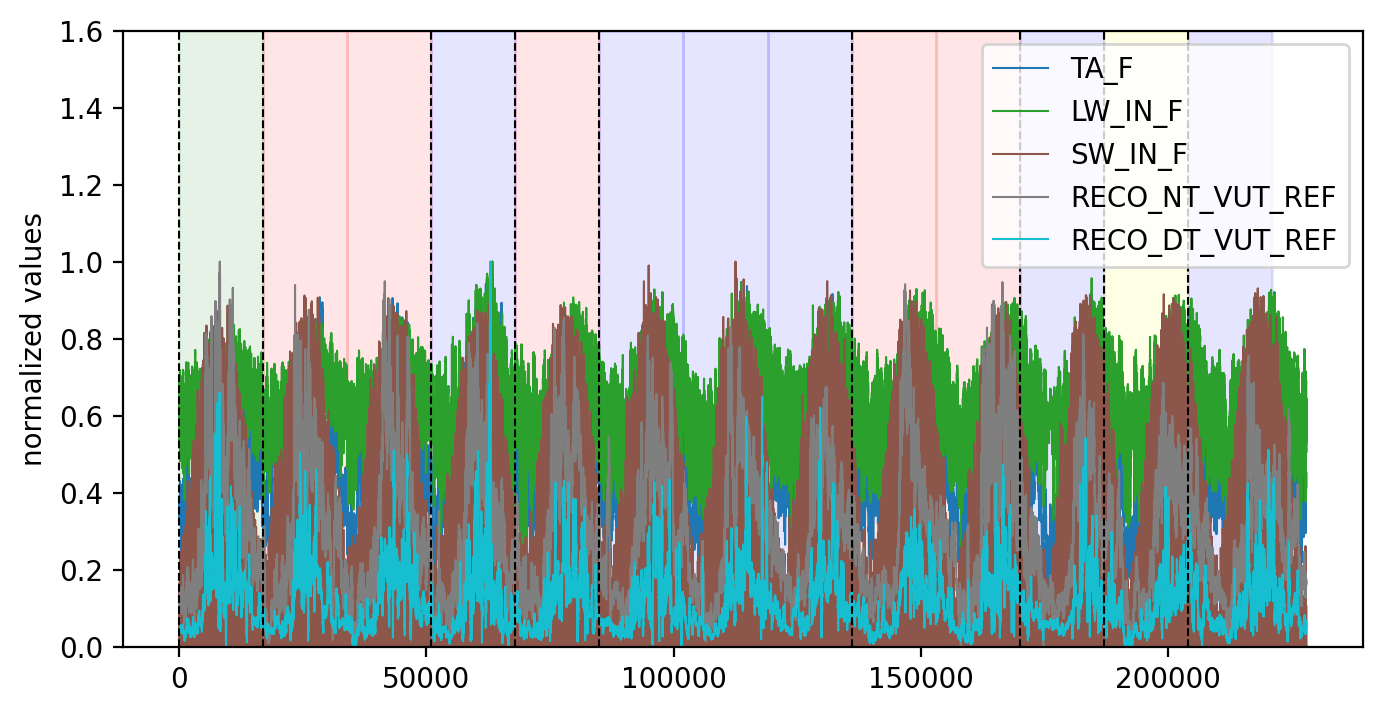

In [17]:
regimes.plot_regimes(data, clusters, cluster_idx, winsize, dtype='real')

In [12]:
clusters_extended = []

for i in range(len(clusters)):

    val = clusters[i]
    for j in range(winsize):
        clusters_extended.append(val)
        
print(len(clusters_extended), data.shape)

4500 (4749, 5)


In [13]:
datanew = data.iloc[:len(clusters_extended), :].copy()
#datanew
datanew['Clusters'] = clusters_extended
#datanew.insert(loc=0,column="TIMESTAMP_END",value=TE)
datanew.insert(loc=0,column="TIMESTAMP",value=TS) #_START",value=TS)
datanew

,TIMESTAMP,TA_F,LW_IN_F,SW_IN_F,RECO_NT_VUT_REF,RECO_DT_VUT_REF,Clusters
0,20000101,0.382840,0.655707,0.011099,0.116222,0.046246,1
1,20000102,0.389205,0.494579,0.071338,0.118804,0.046568,1
2,20000103,0.409998,0.604194,0.052567,0.127744,0.047578,1
3,20000104,0.434076,0.695500,0.010485,0.138333,0.048722,1
4,20000105,0.429138,0.474611,0.135062,0.135502,0.048821,1
...,...,...,...,...,...,...,...
4495,20120422,0.509819,0.575257,0.444723,0.236177,0.114481,2
4496,20120423,0.502367,0.650780,0.420473,0.257414,0.110476,2
4497,20120424,0.539967,0.668204,0.325829,0.306132,0.123767,2
4498,20120425,0.571338,0.676329,0.537664,0.359172,0.135189,2


In [14]:
datanew.to_csv('ClusteredFLX_DE-Hai_FLUXNET2015_FULLSET_DD_2000-2012_1-4.csv')

In [15]:
#data2019

In [16]:
#generates the data for each year from 2019 to 2022

#Year2019=(datanew['TIMESTAMP_END']<=202001010000)
#Year2020=(datanew['TIMESTAMP_START']>=202001010000) & (datanew['TIMESTAMP_END']<=202101010000)
#Year2021=(datanew['TIMESTAMP_START']>=202101010000) & (datanew['TIMESTAMP_END']<=202201010000)
#Year2022=(datanew['TIMESTAMP_START']>=202201010000) & (datanew['TIMESTAMP_END']<=202301010000)
#data2019=datanew[Year2019]
#data2020=datanew[Year2020]
#data2021=datanew[Year2021]
#data2022=datanew[Year2022]